In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
date = '28012021-0943'

projectionData = None
projectionData = pd.read_csv('../Assets/Resources/DataSimulation/Projections/' + date + '-SphereErrors-FingerTips.csv', sep = ";", decimal = '.')
projectionData = projectionData.dropna()

In [3]:
projectionData.head()

Time  Config  NbBloc  Grasp               VF  VFMagnitude  ProjVFX  \
0  3.965900      18       0  False  (0.1, 0.0, 0.0)       0.0932   0.0748   
1  4.456913      18       0  False  (0.1, 0.0, 0.0)       0.0932   0.0748   
2  4.529933      18       0  False  (0.1, 0.0, 0.0)       0.0932   0.0748   
3  4.567817      18       0  False  (0.1, 0.0, 0.0)       0.0932   0.0748   
4  4.603064      18       0  False  (0.1, 0.0, 0.0)       0.0932   0.0748   

   ProjVFY  ProjVFZ  BoneID  ... ErrorThumb.18  ClosestPosition.18  \
0   0.0309  -0.0462       0  ...        0.7132              0.7099   
1   0.0309  -0.0462       0  ...        0.7132              0.7099   
2   0.0309  -0.0462       0  ...        0.7132              0.7135   
3   0.0309  -0.0462       0  ...        0.7132              0.7126   
4   0.0309  -0.0462       0  ...        0.7132              0.7107   

   ProjClosest.18 ErrorClosest.18  IndexTarget.18               ProjIndex.18  \
0          0.2211          0.6746          0.7449  (-0.2032, 0.0337, 0.0787)   
1          0.2211          0.6746          0.7449  (-0.2032, 0.0337, 0.0787)   
2          0.2166          0.6798          0.7449  (-0.2032, 0.0337, 0.0787)   
3          0.2175          0.6786          0.7449  (-0.2032, 0.0337, 0.0787)   
4          0.2199          0.6758          0.7449  (-0.2032, 0.0337, 0.0787)   

   ErrorIndex.18  MiddleTarget.18              ProjMiddle.18 ErrorMiddle.18  
0         0.7116           0.7354  (-0.2177, 0.0361, 0.0843)         0.6965  
1         0.7116           0.7354  (-0.2177, 0.0361, 0.0843)         0.6965  
2         0.7116           0.7354  (-0.2177, 0.0361, 0.0843)         0.6965  
3         0.7116           0.7354  (-0.2177, 0.0361, 0.0843)         0.6965  
4         0.7116           0.7354  (-0.2177, 0.0361, 0.0843)         0.6965  

[5 rows x 294 columns]

In [4]:
projectionData['Grasp_0.5'] = projectionData['Grasp']*0.2

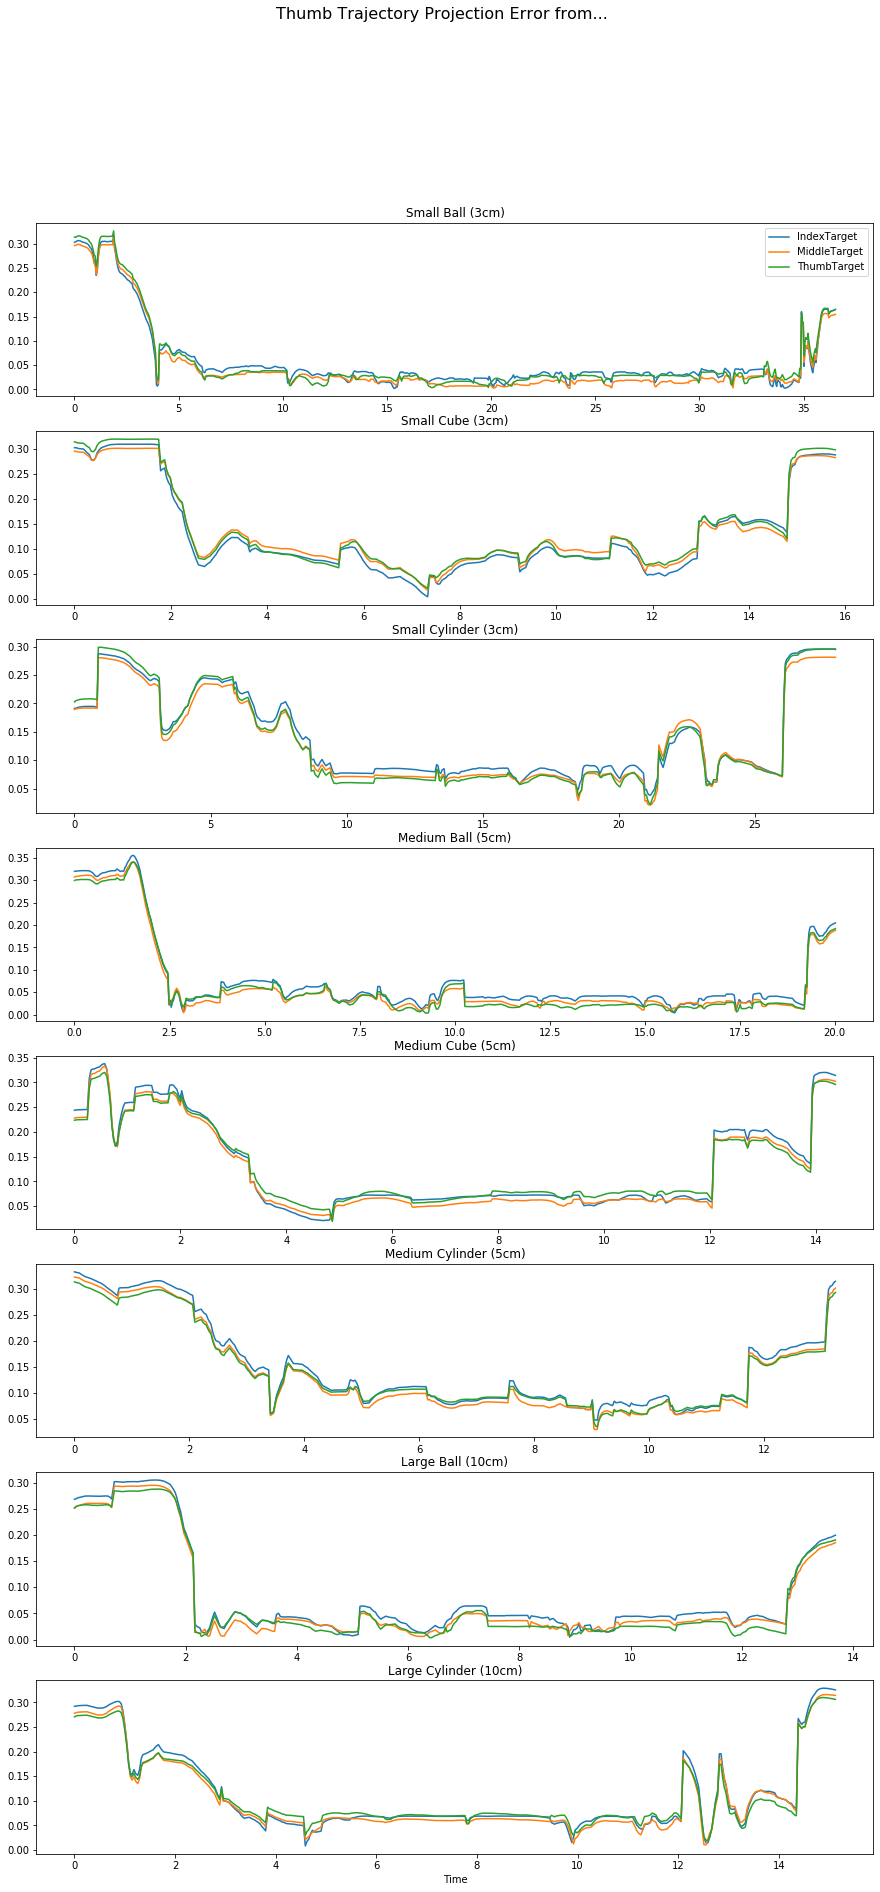

In [6]:
fig, axs = plt.subplots(8, figsize = (15, 30))

titre = 'Game0-Errors_From_Thumb'
k = 6

for j in range(0, 8):
    axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ErrorIndex.'+ str(k)], label ="IndexTarget")
    axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ErrorMiddle.'+ str(k)], label ="MiddleTarget")
    axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ErrorThumb.' + str(k)], label ="ThumbTarget")
    #axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ErrorSphere1.' + str(k)], label ="Sphere1Target")
    #axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ErrorSphere2.' + str(k)], label ="Sphere2Target")
    #axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ErrorSphere3.' + str(k)], label ="Sphere3Target")
    #axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ErrorSphere4.' + str(k)], label ="Sphere4Target")
    #axs[j].scatter(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['Grasp_0.5'])

    #axs[j].set_xlim(0, 25)
axs[0].legend()

axs[0].set_title('Small Ball (3cm)')
axs[3].set_title('Medium Ball (5cm)')
axs[6].set_title('Large Ball (10cm)')
axs[1].set_title('Small Cube (3cm)')
axs[4].set_title('Medium Cube (5cm)')
axs[2].set_title('Large Cube (10cm)')
axs[2].set_title('Small Cylinder (3cm)')
axs[5].set_title('Medium Cylinder (5cm)')
axs[7].set_title('Large Cylinder (10cm)')

axs[7].set(xlabel='Time')

#for ax in axs.flat:
#    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')

    


#axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
fig.suptitle('Thumb Trajectory Projection Error from...', fontsize=16)

fig.savefig('./SubObjects/' + titre +'.png')

In [7]:
projectionData['Grasp_0.5'] = projectionData['Grasp']*0.1

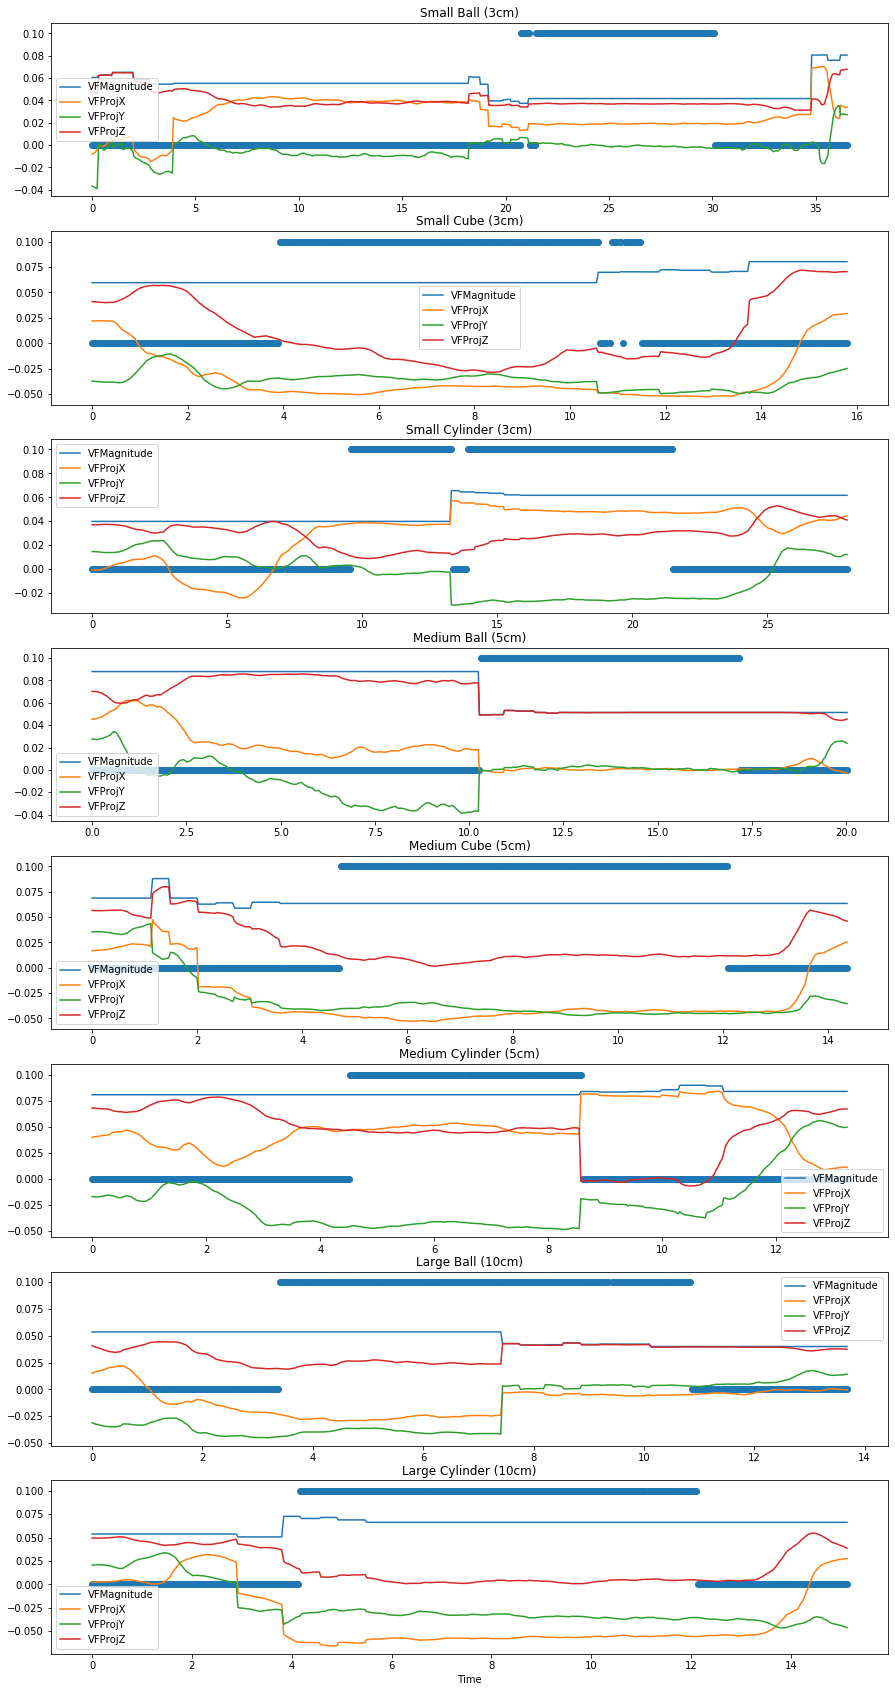

In [8]:
fig, axs = plt.subplots(8, figsize = (15, 30))

titre = 'VF_All'

for j in range(0, 8):
    axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['VFMagnitude'], label ="VFMagnitude")
    axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ProjVFX'], label ="VFProjX")
    axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ProjVFY'], label ="VFProjY")
    axs[j].plot(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['ProjVFZ'], label ="VFProjZ")
    axs[j].scatter(projectionData[projectionData['Config'] == j]['Time'], projectionData[projectionData['Config'] == j]['Grasp_0.5'])

    #axs[j].set_xlim(0, 25)
    axs[j].legend()
#axs[0].legend()

axs[0].set_title('Small Ball (3cm)')
axs[3].set_title('Medium Ball (5cm)')
axs[6].set_title('Large Ball (10cm)')
axs[1].set_title('Small Cube (3cm)')
axs[4].set_title('Medium Cube (5cm)')
axs[2].set_title('Large Cube (10cm)')
axs[2].set_title('Small Cylinder (3cm)')
axs[5].set_title('Medium Cylinder (5cm)')
axs[7].set_title('Large Cylinder (10cm)')

axs[7].set(xlabel='Time')

#for ax in axs.flat:
#    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')

    


#axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

fig.savefig('./SubObjects/' + titre +'.png')

### Configurations:
* 0: grasp from the sides, small object;
* 1: grasp from the top, small object;
* 2: grasp from the sides, medium object;
* 3: grasp from the top, medium object;
* 4: grasp from the sides, large object;
* 5: grasp from the top, large object.

In [9]:
config0 = None
config0 = pd.DataFrame()
config0 = projectionData[projectionData['Config'] == 0]

config1 = None
config1 = pd.DataFrame()
config1 = projectionData[projectionData['Config'] == 1]

config2 = None
config2 = pd.DataFrame()
config2 = projectionData[projectionData['Config'] == 2]

config3 = None
config3 = pd.DataFrame()
config3 = projectionData[projectionData['Config'] == 3]

config4 = None
config4 = pd.DataFrame()
config4 = projectionData[projectionData['Config'] == 4]

config5 = None
config5 = pd.DataFrame()
config5 = projectionData[projectionData['Config'] == 5]

(0, 25)

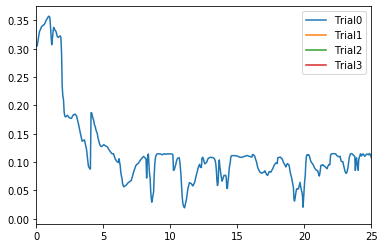

In [10]:
cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['ErrorThumb.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorThumb.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorThumb.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorThumb.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)


(0, 25)

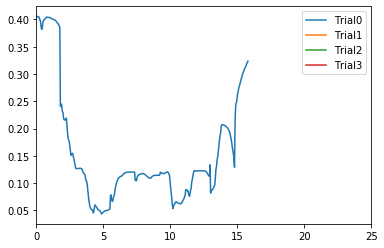

In [11]:
cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['ErrorThumb.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorThumb.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorThumb.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorThumb.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

(0, 25)

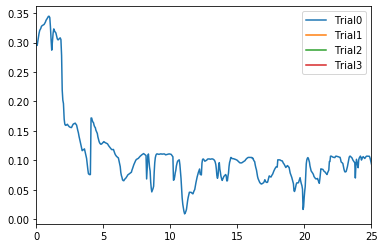

In [12]:
cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['ErrorIndex.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorIndex.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorIndex.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorIndex.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

(0, 25)

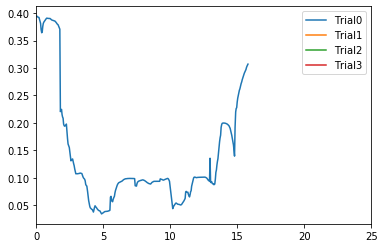

In [13]:
cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['ErrorIndex.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorIndex.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorIndex.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorIndex.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

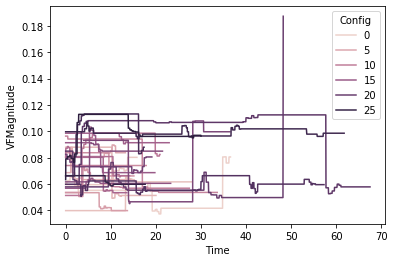

In [14]:
sns.lineplot(x='Time', y='VFMagnitude', hue ='Config', data = projectionData)

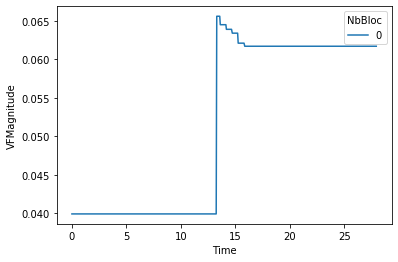

In [15]:
sns.lineplot(x='Time', y='VFMagnitude', hue ='NbBloc', data = projectionData[projectionData['Config'] == 2])

In [16]:
projectionData.columns

Index(['Time', 'Config', 'NbBloc', 'Grasp', 'VF', 'VFMagnitude', 'ProjVFX',
       'ProjVFY', 'ProjVFZ', 'BoneID',
       ...
       'ClosestPosition.18', 'ProjClosest.18', 'ErrorClosest.18',
       'IndexTarget.18', 'ProjIndex.18', 'ErrorIndex.18', 'MiddleTarget.18',
       'ProjMiddle.18', 'ErrorMiddle.18', 'Grasp_0.5'],
      dtype='object', length=295)

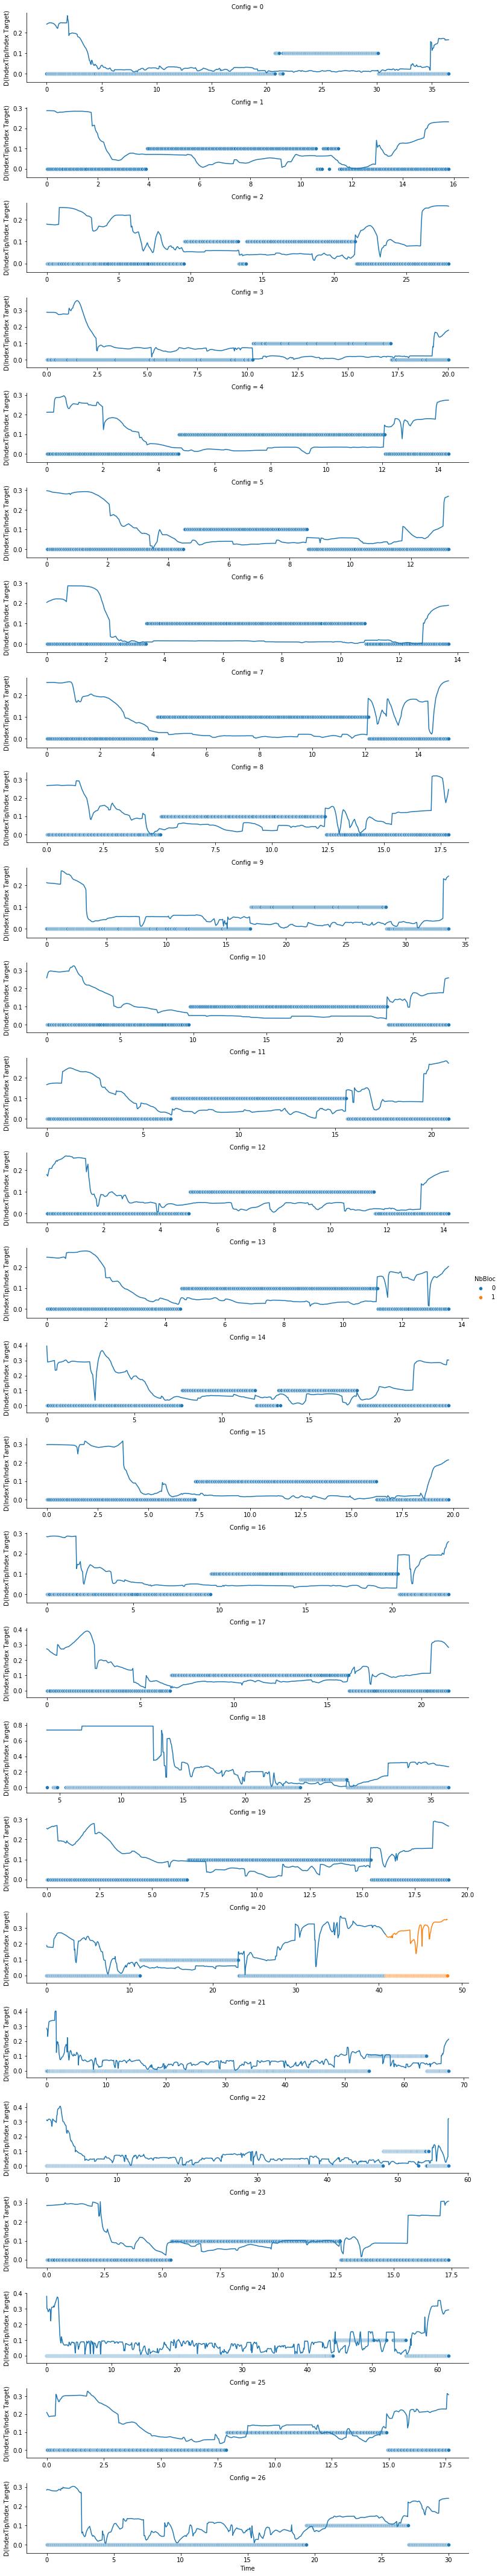

In [17]:
condition = 'ErrorIndex.9'
g = sns.FacetGrid(projectionData, row='Config', hue='NbBloc', legend_out = True, sharex = False, sharey = False, height = 2.2, aspect = 5)
g.map(sns.scatterplot, 'Time', 'Grasp_0.5')
#xlim = (0,50), 
g.map(sns.lineplot, 'Time', condition)
g.add_legend()
g.set(ylabel = 'D(IndexTip/Index Target)')
#labels = ['SmallBall From the Side','SmallBall From the Top','MediumBall From the Side','MediumBall From the Top','BigBall From the Side','BigBall From the Top'])
#plt.legend(title='', loc='upper left', labels=[])
#plt.show(g)

#new_title = ''
#g._legend.set_title(new_title)
## replace labels
#new_labels = ['']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('./Projections/Seaborn/'+ date + '-' + condition + '.png')

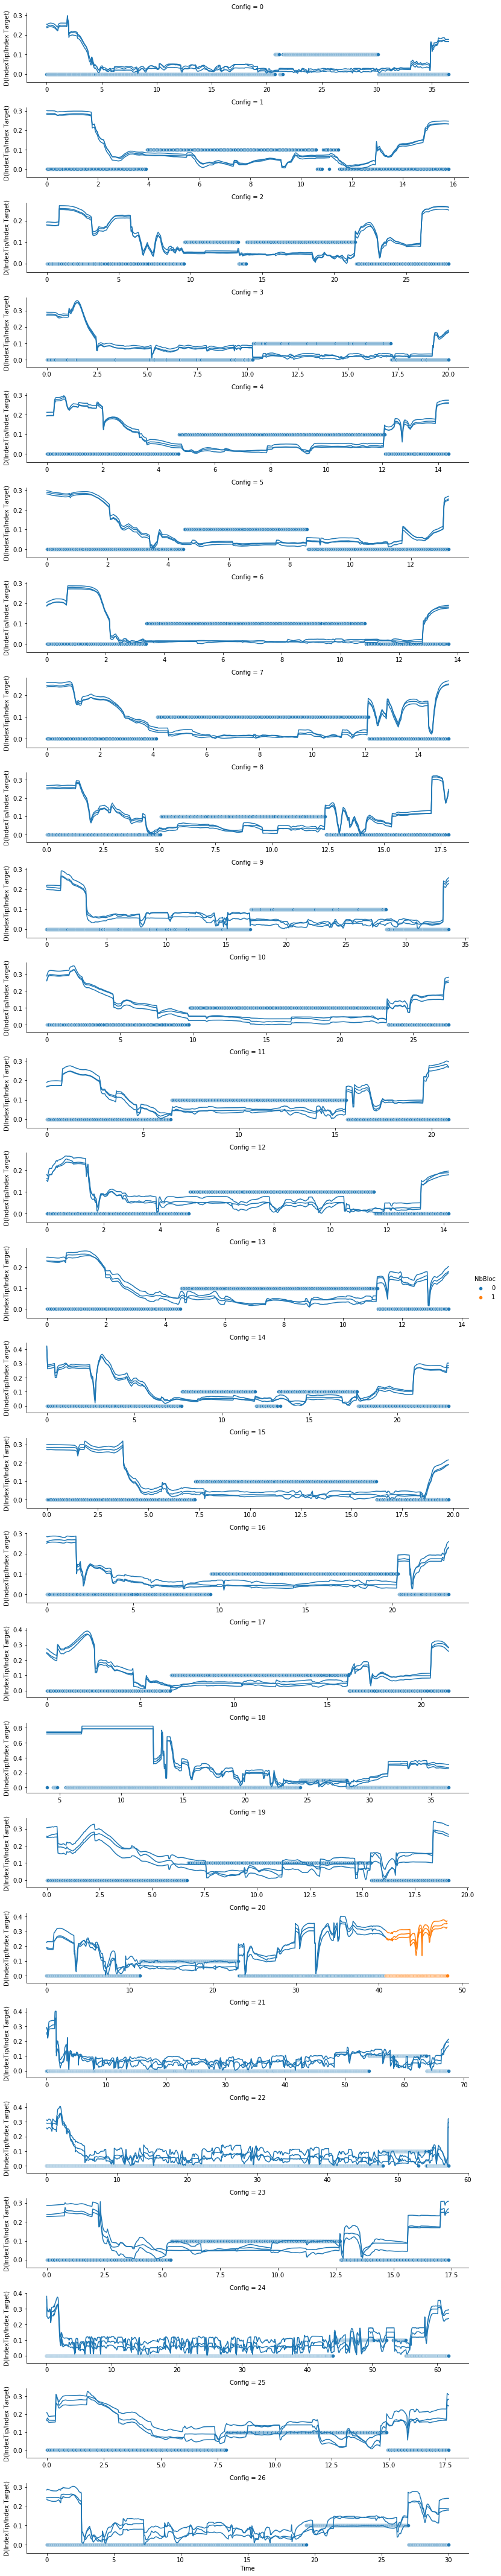

In [18]:
condition = 'ErrorIndex.9'
g = sns.FacetGrid(projectionData, row='Config', hue='NbBloc', legend_out = True, sharex = False, sharey = False, height = 2.2, aspect = 5)
g.map(sns.scatterplot, 'Time', 'Grasp_0.5')
g.map(sns.lineplot, 'Time', 'ErrorThumb.9')
g.map(sns.lineplot, 'Time', 'ErrorMiddle.9')
#xlim = (0,50), 
g.map(sns.lineplot, 'Time', condition)
g.add_legend()
g.set(ylabel = 'D(IndexTip/Index Target)')
#labels = ['SmallBall From the Side','SmallBall From the Top','MediumBall From the Side','MediumBall From the Top','BigBall From the Side','BigBall From the Top'])
#plt.legend(title='', loc='upper left', labels=[])
#plt.show(g)

#new_title = ''
#g._legend.set_title(new_title)
## replace labels
#new_labels = ['']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('./Projections/Seaborn/'+ date + '-' + condition + '.png')

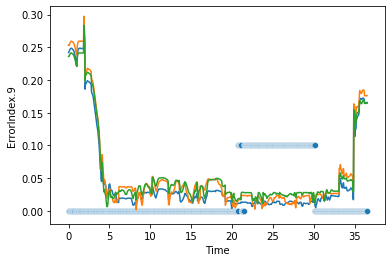

In [20]:
sns.lineplot(x='Time', y='ErrorIndex.9', data = projectionData[projectionData['Config'] == 0])
sns.lineplot(x='Time', y='ErrorThumb.9', data = projectionData[projectionData['Config'] == 0])
sns.lineplot(x='Time', y='ErrorMiddle.9', data = projectionData[projectionData['Config'] == 0])
#sns.lineplot(x='Time', y='ErrorSphere1.9', data = projectionData[projectionData['Config'] == 0])
#sns.lineplot(x='Time', y='ErrorSphere2.9', data = projectionData[projectionData['Config'] == 0])
#sns.lineplot(x='Time', y='ErrorSphere3.9', data = projectionData[projectionData['Config'] == 0])
#sns.lineplot(x='Time', y='ErrorSphere4.9', data = projectionData[projectionData['Config'] == 0])
sns.scatterplot(x='Time', y='Grasp_0.5', data = projectionData[projectionData['Config'] == 0])



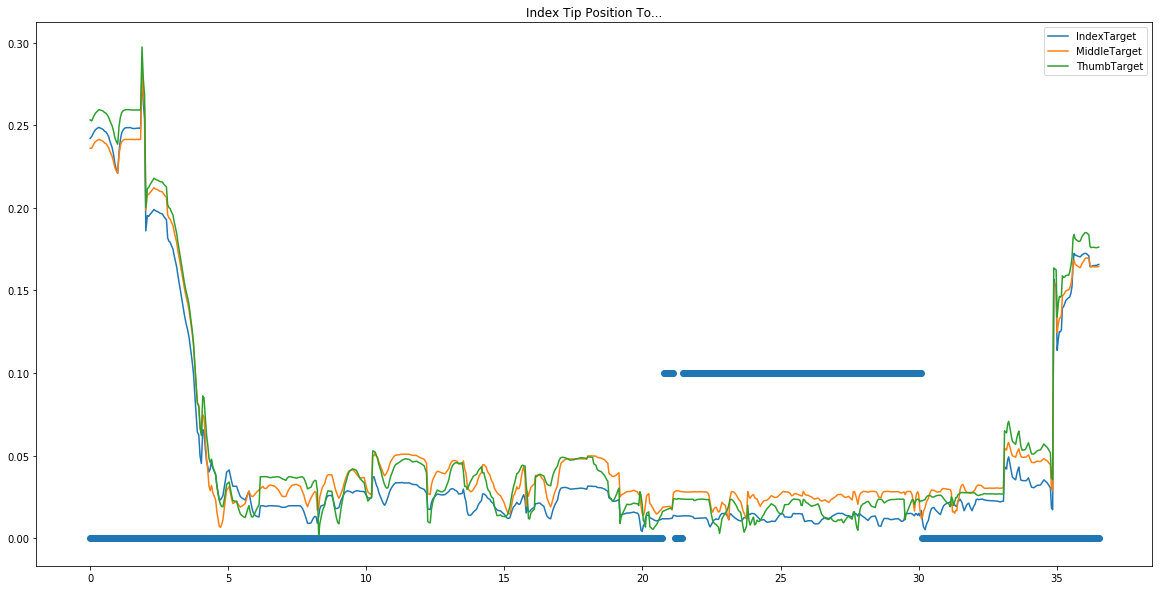

In [21]:
plt.figure(figsize=(20,10))
plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorIndex.9'], label ="IndexTarget")
plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorMiddle.9'], label ="MiddleTarget")
plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorThumb.9'], label ="ThumbTarget")
#plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorSphere1.9'], label ="Sphere1Target")
#plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorSphere2.9'], label ="Sphere2Target")
#plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorSphere3.9'], label ="Sphere3Target")
#plt.plot(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['ErrorSphere4.9'], label ="Sphere4Target")
plt.scatter(projectionData[projectionData['Config'] == 0]['Time'], projectionData[projectionData['Config'] == 0]['Grasp_0.5'])
plt.title('Index Tip Position To...')
plt.legend()


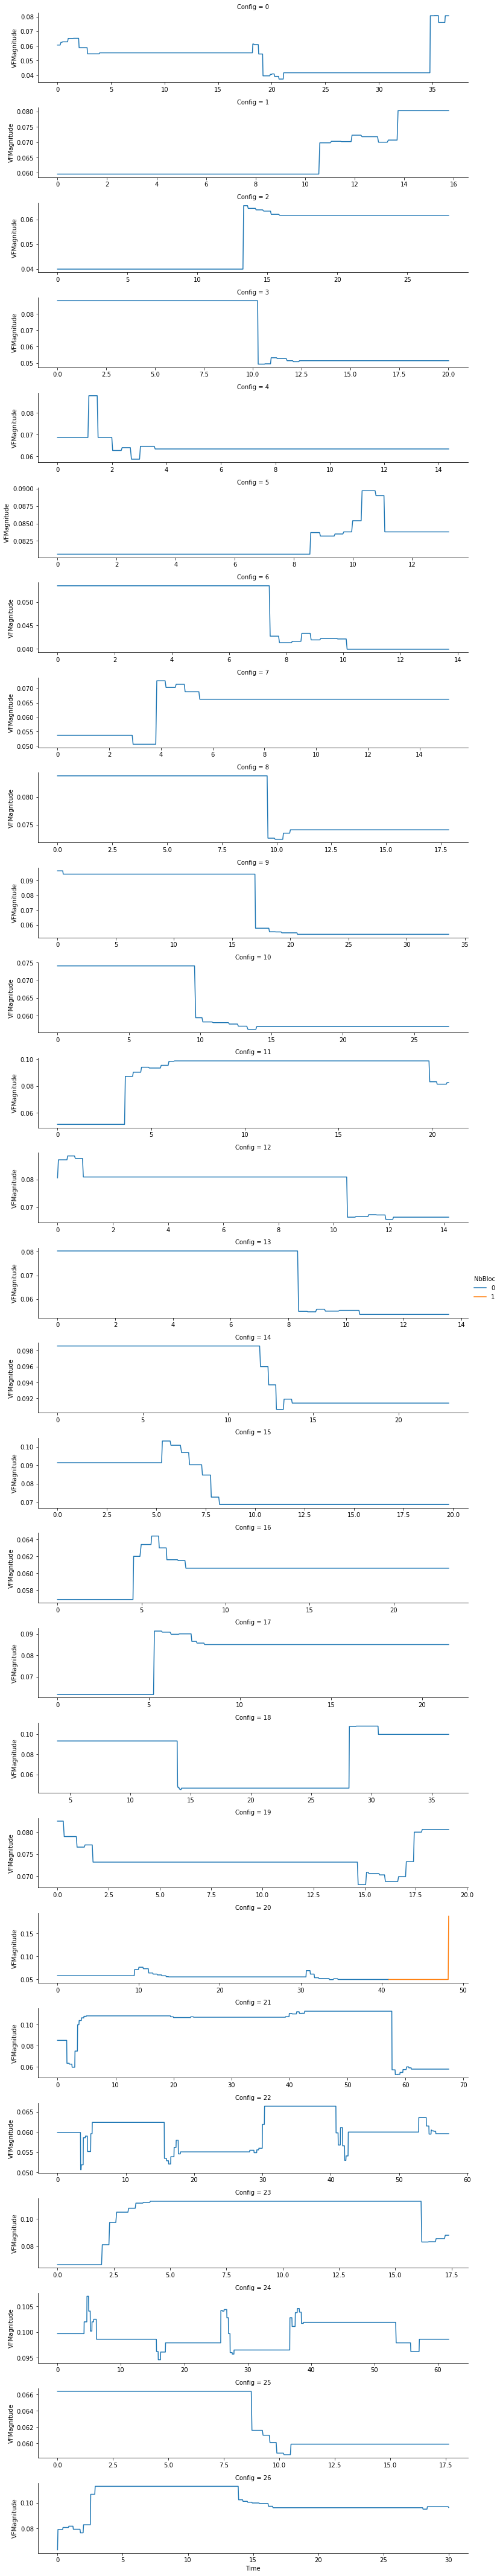

In [22]:
condition = 'VFMagnitude'
g = sns.FacetGrid(projectionData, row='Config', hue='NbBloc', legend_out = True, sharex = False, sharey = False, height = 2.2, aspect = 5)
#xlim = (0,50), 
g.map(sns.lineplot, 'Time', condition)
g.add_legend()
g.set(ylabel = 'VFMagnitude')

g.savefig('./Projections/Seaborn/Meeting' + condition + '.png')

In [12]:
projectionData.columns[9] #Name - BONEID 0
projectionData.columns[24] # Name.1 - BONEID 1

#BONEID THUMB TIP = 6; BONEID INDEX TIP = 9
boneID = 6
multiply = 9 + 15*boneID
projectionData.columns[multiply]

'ErrorSphere1.4'